# 한국은행 OpenAPI 02 - 주요 경제 지표

<img src="http://ecos.bok.or.kr/images/new/openapi/api_visual.gif" />

#### 2017 FinanceData http://fb.com/financedata

# 주요 경제 지표
* GDP 성장률
* 소비자 물가
* 생산자 물가
* 경상수지
* M2(평잔)

# 데이터 조회 예시: 예금은행 종별예금

## 코드
* 001Y011: 예금은행 종별예금(말잔) 

In [1]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize

auth_key = "G9FSKDP0EDJ4BVOZ5B9D/"
req_type = "json/"
lang = "kr/"
start_no = "1/"
end_no ="10000/"
stat_code = "001Y011/" 
cycle_type = "QQ/"
start_date = "196501/"
end_date = "201609/"
item_no = ""

url = "http://ecos.bok.or.kr/api/StatisticSearch/" +  \
    auth_key + req_type + lang + start_no + end_no + \
    stat_code + cycle_type + start_date + end_date + item_no

r = requests.get(url)
r.text[:1024]

'{"StatisticSearch":{"list_total_count":3279,"row":[{"UNIT_NAME":"십억원 ","STAT_NAME":"3.1.1 예금은행 종별예금(말잔)","ITEM_CODE1":"BDAA1","STAT_CODE":"001Y011","ITEM_CODE2":" ","ITEM_CODE3":" ","ITEM_NAME1":"총예금","ITEM_NAME2":" ","DATA_VALUE":"644.6","ITEM_NAME3":" ","TIME":"19701"},{"UNIT_NAME":"십억원 ","STAT_NAME":"3.1.1 예금은행 종별예금(말잔)","ITEM_CODE1":"BDAA1","STAT_CODE":"001Y011","ITEM_CODE2":" ","ITEM_CODE3":" ","ITEM_NAME1":"총예금","ITEM_NAME2":" ","DATA_VALUE":"672.7","ITEM_NAME3":" ","TIME":"19702"},{"UNIT_NAME":"십억원 ","STAT_NAME":"3.1.1 예금은행 종별예금(말잔)","ITEM_CODE1":"BDAA1","STAT_CODE":"001Y011","ITEM_CODE2":" ","ITEM_CODE3":" ","ITEM_NAME1":"총예금","ITEM_NAME2":" ","DATA_VALUE":"725.2","ITEM_NAME3":" ","TIME":"19703"},{"UNIT_NAME":"십억원 ","STAT_NAME":"3.1.1 예금은행 종별예금(말잔)","ITEM_CODE1":"BDAA1","STAT_CODE":"001Y011","ITEM_CODE2":" ","ITEM_CODE3":" ","ITEM_NAME1":"총예금","ITEM_NAME2":" ","DATA_VALUE":"787","ITEM_NAME3":" ","TIME":"19704"},{"UNIT_NAME":"십억원 ","STAT_NAME":"3.1.1 예금은행 종별예금(말잔)","ITEM_CODE1"

In [2]:
# json_normalize()

jo = json.loads(r.text)

result = json_normalize(jo['StatisticSearch']['row'])
result.head(12)

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
0,644.6,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19701,십억원
1,672.7,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19702,십억원
2,725.2,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19703,십억원
3,787,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19704,십억원
4,857.5,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19711,십억원
5,907.3,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19712,십억원
6,932.7,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19713,십억원
7,977.6,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19714,십억원
8,1028.7,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19721,십억원
9,1089.9,BDAA1,,,총예금,,,001Y011,3.1.1 예금은행 종별예금(말잔),19722,십억원


In [3]:
print (str(len(result)) + "건")

3279건


# 함수로 만들기

In [4]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize

def query_ecos(stat_code, start_date, end_date, cycle_type="QQ"):
    auth_key = "G9FSKDP0EDJ4BVOZ5B9D/"
    req_type = "json/"
    lang = "kr/"
    start_no = "1/"
    end_no ="10000/"
    stat_code = stat_code + "/" 
    cycle_type = cycle_type + "/"
    start_date = start_date + "/"
    end_date = end_date + "/"
    item_no = ""

    url = "http://ecos.bok.or.kr/api/StatisticSearch/" +  \
        auth_key + req_type + lang + start_no + end_no + \
        stat_code + cycle_type + start_date + end_date + item_no

    r = requests.get(url)
    if '해당하는 데이터가 없습니다' in r.text:
        return None
    
    jo = json.loads(r.text)
    df = json_normalize(jo['StatisticSearch']['row'])
    df['TIME'] = df['TIME'] + '0101'
    df['TIME'] = df['TIME'].str.replace(r'(\d{4})(\d{2})(\d{2})(.*)', r'\1-\2-\3')
    return df

(참고) 날짜에 처리
```python
    df['TIME'] = df['TIME'] + '0101'
    df['TIME'] = df['TIME'].str.replace(r'(\d{4})(\d{2})(\d{2})(.*)', r'\1-\2-\3')
```
위 코드는 다음과 같이 날짜 형식을 균일하게 대체

* 'YYYY' → 'YYYY-01-01'
* 'YYYYMM' → 'YYYY-MM-01'
* 'YYYYMMDD' → 'YYYY-MM-DD'

# 데이터 조회 예시: 통화지표

* M1(협의통화) = 현금통화 + 요구불예금 + 수시입출식 저축성예금
* M2(광의통화) = M1 + 정기예적금 및 부금 + 시장형 상품 + 실적배당형 상품 + 금융채  + 기타

## 코드
* I01Y001 본원통화 (base reserve)
* I01Y002 협의 통화 (M1)
* I01Y003 광의 통화 (M2)

## 예시
* http://ecos.bok.or.kr/api/StatisticSearch/G9FSKDP0EDJ4BVOZ5B9D/json/kr/1/1000/I01Y001/MM/20150101/20160630
* http://ecos.bok.or.kr/api/StatisticSearch/G9FSKDP0EDJ4BVOZ5B9D/json/kr/1/1000/I01Y002/MM/20150101/20160630
* http://ecos.bok.or.kr/api/StatisticSearch/G9FSKDP0EDJ4BVOZ5B9D/json/kr/1/1000/I01Y003/MM/20150101/20160630


In [5]:
stat_code = "I01Y001"
cycle_type = "MM"
start_date = "2000"
end_date = "2018"

df = query_ecos(stat_code, start_date, end_date, cycle_type)
df.head()

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
0,29,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-01-01,십억달러
1,27.3,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-02-01,십억달러
2,27.5,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-03-01,십억달러
3,28.1,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-04-01,십억달러
4,27.8,AUS,,,호주,,,I01Y001,18.1.1 본원통화,2000-05-01,십억달러


In [6]:
# print (str(len(df)) + "건")

In [7]:
df_base = df[df['ITEM_NAME1'] == '한국']
df_base.head()

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
867,26618.7,KOR,,,한국,,,I01Y001,18.1.1 본원통화,2000-01-01,십억원
868,25172.4,KOR,,,한국,,,I01Y001,18.1.1 본원통화,2000-02-01,십억원
869,24806.1,KOR,,,한국,,,I01Y001,18.1.1 본원통화,2000-03-01,십억원
870,25906.4,KOR,,,한국,,,I01Y001,18.1.1 본원통화,2000-04-01,십억원
871,25492.1,KOR,,,한국,,,I01Y001,18.1.1 본원통화,2000-05-01,십억원


In [8]:
df = query_ecos("I01Y002", start_date, end_date, 'MM')

df_m1 = df[df['ITEM_NAME1'] == '한국']
df_m1.head()

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
838,168969,KOR,,,한국,,,I01Y002,18.1.2 협의통화,2000-01-01,십억원
839,171222,KOR,,,한국,,,I01Y002,18.1.2 협의통화,2000-02-01,십억원
840,173730.3,KOR,,,한국,,,I01Y002,18.1.2 협의통화,2000-03-01,십억원
841,182617.1,KOR,,,한국,,,I01Y002,18.1.2 협의통화,2000-04-01,십억원
842,179263.3,KOR,,,한국,,,I01Y002,18.1.2 협의통화,2000-05-01,십억원


In [9]:
df = query_ecos("I01Y003", start_date, end_date, 'MM')

df_m2 = df[df['ITEM_NAME1'] == '한국']
df_m2.head()

,DATA_VALUE,ITEM_CODE1,ITEM_CODE2,ITEM_CODE3,ITEM_NAME1,ITEM_NAME2,ITEM_NAME3,STAT_CODE,STAT_NAME,TIME,UNIT_NAME
854,676895.4,KOR,,,한국,,,I01Y003,18.1.3 광의통화,2000-01-01,십억원
855,679807.1,KOR,,,한국,,,I01Y003,18.1.3 광의통화,2000-02-01,십억원
856,684735.3,KOR,,,한국,,,I01Y003,18.1.3 광의통화,2000-03-01,십억원
857,692399,KOR,,,한국,,,I01Y003,18.1.3 광의통화,2000-04-01,십억원
858,687687.3,KOR,,,한국,,,I01Y003,18.1.3 광의통화,2000-05-01,십억원


# 통화량의 변화 차트

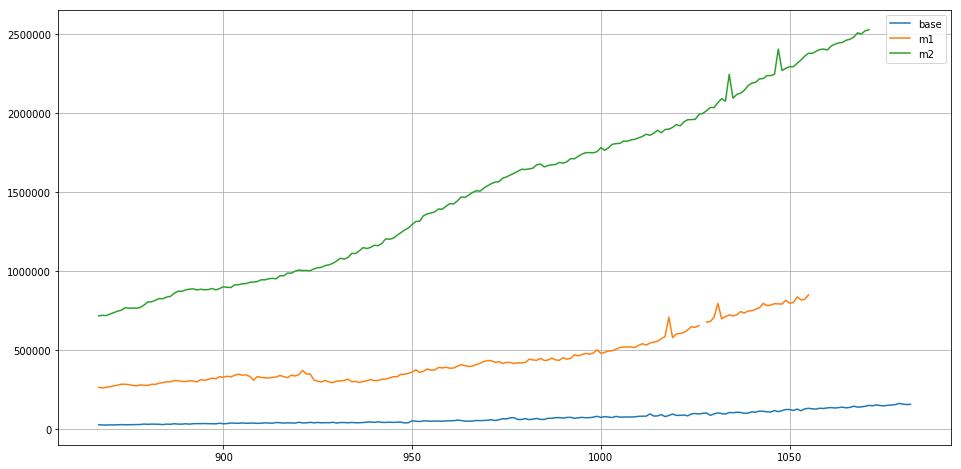

In [10]:
%matplotlib inline
import pandas as pd

df_plot = pd.DataFrame()
df_plot['base'] = pd.to_numeric(df_base['DATA_VALUE'])
df_plot['m1'] = pd.to_numeric(df_m1['DATA_VALUE'])
df_plot['m2'] = pd.to_numeric(df_m2['DATA_VALUE'])

df_plot.plot(figsize=(16,8), grid=True)

----
#### 2017, 2018 FinanceData http://fb.com/financedata http://financedata.github.com